# Evaluation of UNET performance upon common distortions

The aim of this notebook is to provide some informations about how a UNET initially trained to segment cells is perturbated by some common distortions applied on the input images. The tested distortions applied on the inputs are an added 2D gaussian, a gaussian noise as well as a rescaling of the input images. To evaluate the performance of the UNET, several plots are generated: the accuracy, the Jaccard index and the number of detected cells in function of the degree of degradation that depends on the parameters of the distortions.

### $\bullet$ Importing libraries and utilitary functions

In [1]:
# import python libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(500)
%load_ext autoreload
%autoreload 2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow

# import distortion filters and utilitary functions
from distortions import add_gaussian, zoom_image, zoom_image_to_meet_shape, add_gaussian_noise
from utils import *
from plots import show_image_mask, show_image_pred, plot_all

### $\bullet$ Setting size of the input image and different paths

In [2]:
# Shape of the inputs of the deep network.
images_shape = (256, 256, 1)

# Variables defining the path to the dataset.
test_input_path = '../Dataset/test/input/'
test_output_path = '../Dataset/test/output/'

# Variable defining where model is stored.
model_save_path = "../Model Original/"

### $\bullet$ Function to display the input images and predictions upon distorsion as well as a summary of values that shows the quality of the predicted images compared to the ground truth

In [3]:
def evaluation_summary(result, parameter_name, parameter_val, image, mask, distorted_image, model):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    
    """
    print("{:<45}: {}".format(parameter_name.upper()          , parameter_val))
    print("{:<45}: {}".format("Accuracy"                      , result["accuracy"]))
    print("{:<45}: {}".format("Jaccard score"                 , result["jaccard"]))
    print("{:<45}: {}".format("Precision"                     , result["precision"]))
    print("{:<45}: {}".format("Recall"                        , result["recall"]))
    print("{:<45}: {}".format("Number of cells in predictions", result["number_cells_predictions"]))
    print("{:<45}: {}".format("Number of cells in masks"      , result["number_cells_masks"]))
    show_image_mask(image, mask)
    show_image_pred(distorted_image, model)
    
    
def evaluate_model(images, masks, model, number_cells_masks=None):
    """Eval.
    
    Args:
        images::[np.array]
            The output measures associated to the input measures tX.
        masks::[np.array]
            The input measures.
    Returns:
        accuracy::[float]
            An array comprised of n_folds equally distributed arrays of y.
        jaccard_score::[float]
            An array comprised of n_folds equally distributed arrays of tX.
        number_cells_predictions::[int]
        number_cells_masks::[int]
    
    """
    predictions = get_binary_predictions(images, model)
    accuracy    = np.mean(predictions == masks)
    jaccard     = compute_jaccard_score(predictions, masks)
    precision, recall = compute_precision_recall(predictions, masks)

    number_cells_predictions = get_number_cells(predictions)
    if number_cells_masks is None:
        number_cells_masks = get_number_cells(masks)
    
    return {"accuracy": accuracy, "jaccard": jaccard, "precision": precision, 
            "recall": recall, "number_cells_predictions": number_cells_predictions,
            "number_cells_masks": number_cells_masks}


def apply_distortion_to_all(function, images, params_for_images={}):
    distorted_images = []
    for image in images:
        distorted_images.append(function(image, **params_for_images))
    
    return np.array(distorted_images)

### $\bullet$ Retrieve trained model

In [4]:
model = tensorflow.keras.models.load_model(model_save_path)

### $\bullet$ Get input images with the wanted shape from dataset

In [5]:
test_images, test_masks = get_dataset_from_folders(test_input_path, test_output_path, images_shape)

print(f'Test set contains {len(test_images)} images of shape {test_images[0].shape}.')

number_cells_masks = get_number_cells(test_masks)
print(f"{number_cells_masks} cells were counted in total over all masks.")

Test set contains 510 images of shape (256, 256, 1).
16527 cells were counted in total over all masks.


### $\bullet$ Analysis of the perturbations caused by an added gaussian on the UNET performance

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 0.0
Accuracy                                     : 0.9856482412300858
Jaccard score                                : 0.8237746790660512
Precision                                    : 0.8542445735274116
Recall                                       : 0.9587936872122087
Number of cells in predictions               : 18226
Number of cells in masks                     : 16527


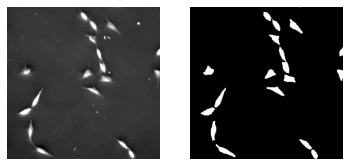

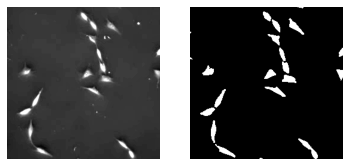

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 100.0
Accuracy                                     : 0.9883168837603401
Jaccard score                                : 0.8514765089407754
Precision                                    : 0.889393072437785
Recall                                       : 0.9524672055265834
Number of cells in predictions               : 17310
Number of cells in masks                     : 16527


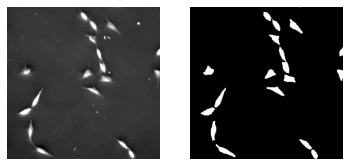

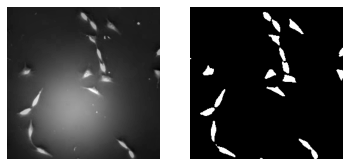

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 200.0
Accuracy                                     : 0.9884068806966145
Jaccard score                                : 0.8501019460818376
Precision                                    : 0.9083068452125516
Recall                                       : 0.93025998454658
Number of cells in predictions               : 16933
Number of cells in masks                     : 16527


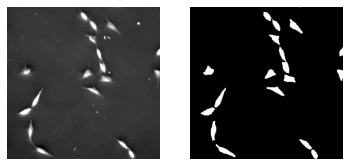

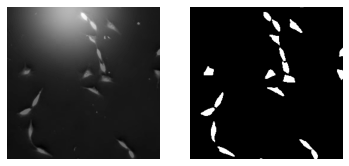

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 300.0
Accuracy                                     : 0.9868857290230545
Jaccard score                                : 0.8292071194180581
Precision                                    : 0.9152548312650879
Recall                                       : 0.898552173519379
Number of cells in predictions               : 16691
Number of cells in masks                     : 16527


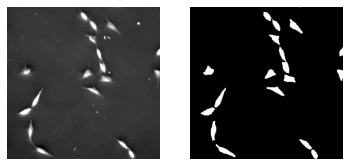

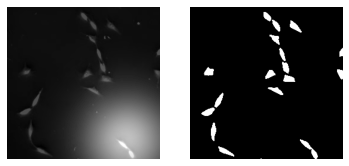

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 400.0
Accuracy                                     : 0.984906753839231
Jaccard score                                : 0.8031549113732246
Precision                                    : 0.9182681231034611
Recall                                       : 0.8655026830848912
Number of cells in predictions               : 16449
Number of cells in masks                     : 16527


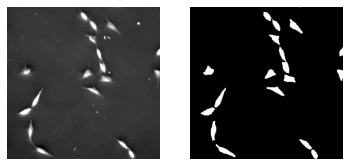

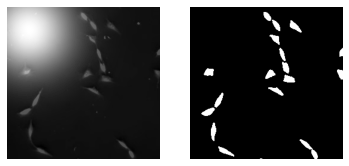

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 500.0
Accuracy                                     : 0.982165407666973
Jaccard score                                : 0.7659592684016723
Precision                                    : 0.9192707444283507
Recall                                       : 0.8218507368642936
Number of cells in predictions               : 16296
Number of cells in masks                     : 16527


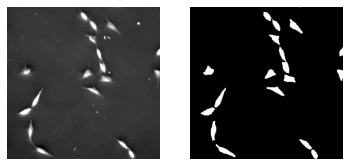

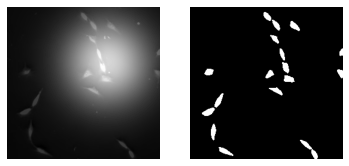

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 600.0
Accuracy                                     : 0.979112393248315
Jaccard score                                : 0.7249138703946573
Precision                                    : 0.9204614712036732
Recall                                       : 0.7742173019742312
Number of cells in predictions               : 16080
Number of cells in masks                     : 16527


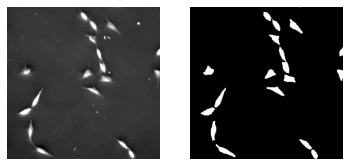

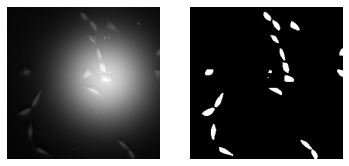

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 700.0
Accuracy                                     : 0.9755573945886948
Jaccard score                                : 0.6767746426827439
Precision                                    : 0.9217946461288055
Recall                                       : 0.7189208912489294
Number of cells in predictions               : 15708
Number of cells in masks                     : 16527


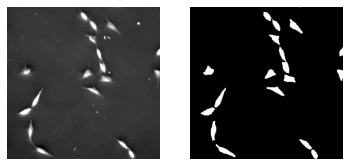

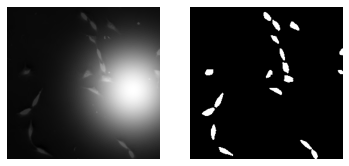

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 800.0
Accuracy                                     : 0.9710818720798866
Jaccard score                                : 0.6161753941140604
Precision                                    : 0.9228847138044468
Recall                                       : 0.6506721674432745
Number of cells in predictions               : 15039
Number of cells in masks                     : 16527


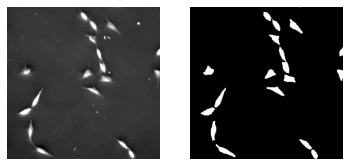

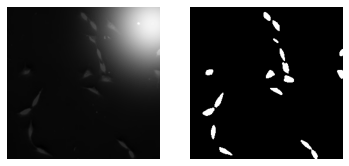

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 900.0
Accuracy                                     : 0.9669358197380514
Jaccard score                                : 0.5582317004156991
Precision                                    : 0.9234008576775458
Recall                                       : 0.5862913255003757
Number of cells in predictions               : 14306
Number of cells in masks                     : 16527


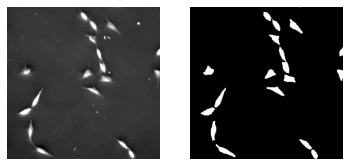

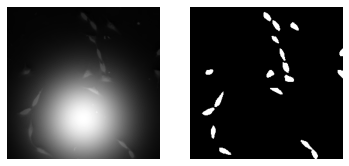

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1000.0
Accuracy                                     : 0.9619938569910386
Jaccard score                                : 0.48740881820510207
Precision                                    : 0.9232550254980405
Recall                                       : 0.508878216875359
Number of cells in predictions               : 13197
Number of cells in masks                     : 16527


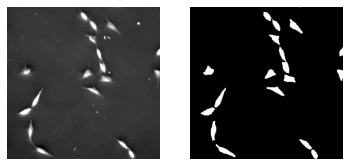

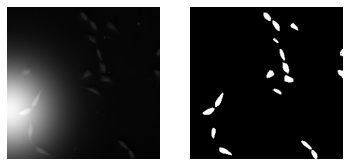

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1100.0
Accuracy                                     : 0.9575799680223652
Jaccard score                                : 0.4249077102285529
Precision                                    : 0.9223393821600884
Recall                                       : 0.441085702696217
Number of cells in predictions               : 12157
Number of cells in masks                     : 16527


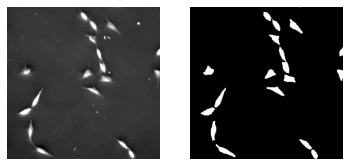

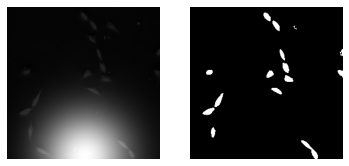

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1200.0
Accuracy                                     : 0.9531051934934129
Jaccard score                                : 0.35539995754451603
Precision                                    : 0.9236936067012472
Recall                                       : 0.3665679243566909
Number of cells in predictions               : 10926
Number of cells in masks                     : 16527


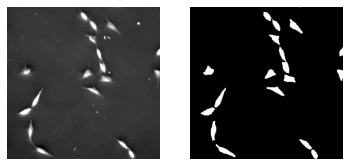

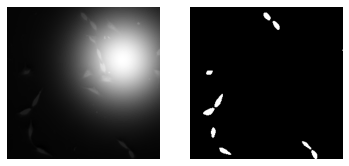

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1300.0
Accuracy                                     : 0.949276673560049
Jaccard score                                : 0.2972477795846241
Precision                                    : 0.922896020973622
Recall                                       : 0.30528441908940157
Number of cells in predictions               : 9745
Number of cells in masks                     : 16527


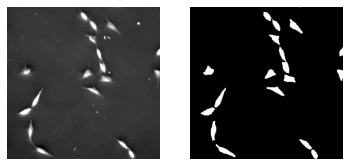

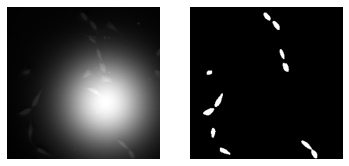

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1400.0
Accuracy                                     : 0.9453215655158548
Jaccard score                                : 0.23570269463424082
Precision                                    : 0.9214804883996944
Recall                                       : 0.24059162113288643
Number of cells in predictions               : 8403
Number of cells in masks                     : 16527


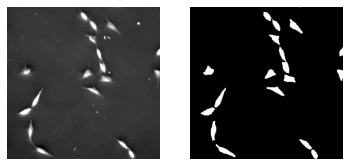

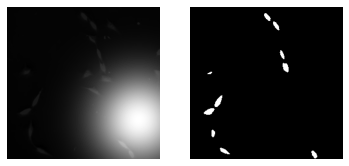

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1500.0
Accuracy                                     : 0.9418701471066943
Jaccard score                                : 0.1820596150249434
Precision                                    : 0.9215018166328668
Recall                                       : 0.18489827104177847
Number of cells in predictions               : 7023
Number of cells in masks                     : 16527


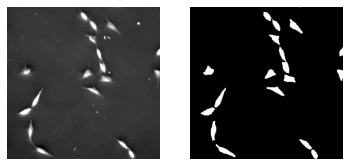

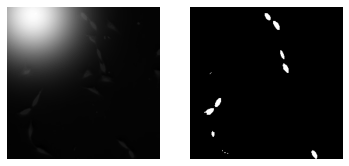

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1600.0
Accuracy                                     : 0.9389242733226103
Jaccard score                                : 0.13363934032939634
Precision                                    : 0.9131059033354231
Recall                                       : 0.13517461774806974
Number of cells in predictions               : 5769
Number of cells in masks                     : 16527


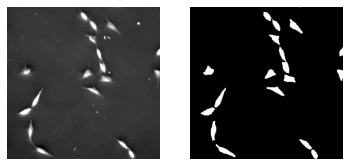

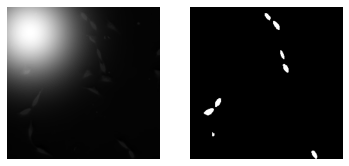

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1700.0
Accuracy                                     : 0.93665023504519
Jaccard score                                : 0.09507542084424353
Precision                                    : 0.9225421696948827
Recall                                       : 0.09582395604151986
Number of cells in predictions               : 4627
Number of cells in masks                     : 16527


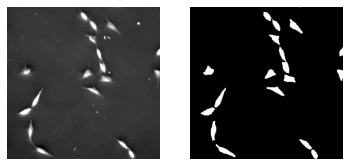

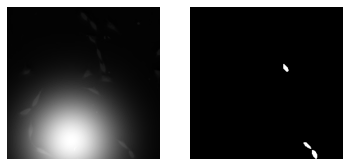

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1800.0
Accuracy                                     : 0.9348673801796109
Jaccard score                                : 0.06538033610367255
Precision                                    : 0.9135931504420484
Recall                                       : 0.06572763163804649
Number of cells in predictions               : 3692
Number of cells in masks                     : 16527


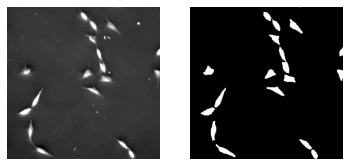

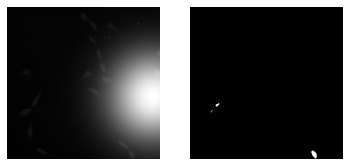

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 1900.0
Accuracy                                     : 0.9333720487706801
Jaccard score                                : 0.03826468109560413
Precision                                    : 0.8887626170313079
Recall                                       : 0.038406049956957455
Number of cells in predictions               : 2706
Number of cells in masks                     : 16527


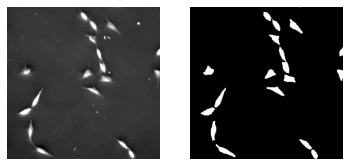

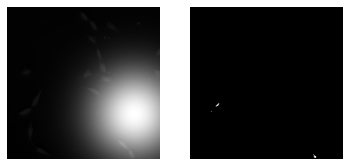

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2000.0
Accuracy                                     : 0.9324787813074449
Jaccard score                                : 0.02318739913079086
Precision                                    : 0.8527643695378361
Recall                                       : 0.023242657304004356
Number of cells in predictions               : 2033
Number of cells in masks                     : 16527


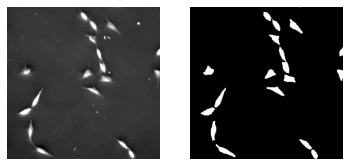

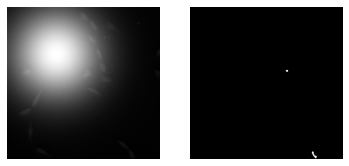

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2100.0
Accuracy                                     : 0.9318773157456341
Jaccard score                                : 0.01282388264235639
Precision                                    : 0.7385896122540325
Recall                                       : 0.01284805239732081
Number of cells in predictions               : 1571
Number of cells in masks                     : 16527


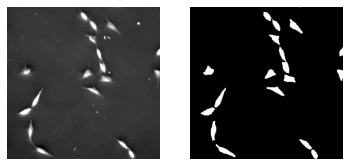

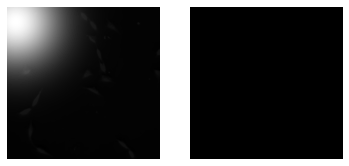

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2200.0
Accuracy                                     : 0.9315269021426931
Jaccard score                                : 0.006966087307869651
Precision                                    : 0.5864397915801952
Recall                                       : 0.006976760903263849
Number of cells in predictions               : 1177
Number of cells in masks                     : 16527


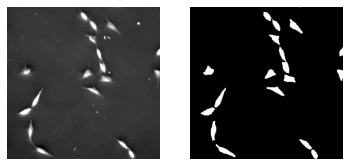

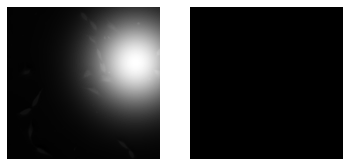

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2300.0
Accuracy                                     : 0.9313525629978554
Jaccard score                                : 0.003808178883063388
Precision                                    : 0.47699075317900136
Recall                                       : 0.003811644744617867
Number of cells in predictions               : 942
Number of cells in masks                     : 16527


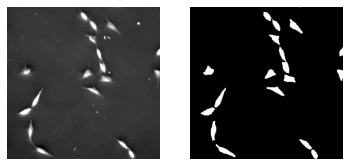

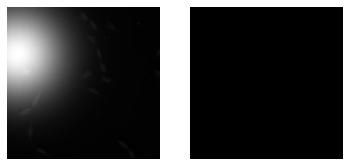

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2400.0
Accuracy                                     : 0.9312507180606617
Jaccard score                                : 0.002180045534365845
Precision                                    : 0.3226684208549685
Recall                                       : 0.0021815028342069306
Number of cells in predictions               : 794
Number of cells in masks                     : 16527


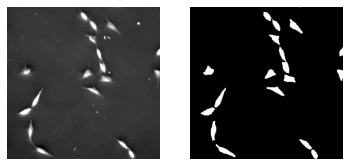

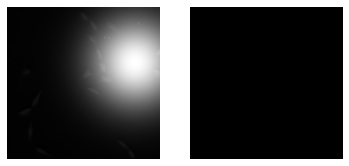

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2500.0
Accuracy                                     : 0.9311908796721814
Jaccard score                                : 0.0012374803941795883
Precision                                    : 0.23834879699205067
Recall                                       : 0.0012378386632712185
Number of cells in predictions               : 695
Number of cells in masks                     : 16527


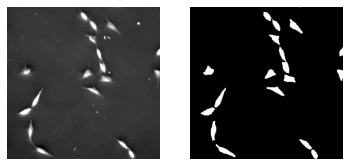

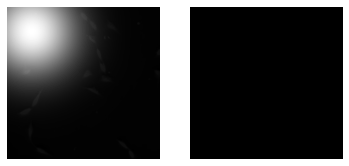

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2600.0
Accuracy                                     : 0.9311549168007046
Jaccard score                                : 0.0006370247655320399
Precision                                    : 0.18214324154553038
Recall                                       : 0.000637115693061591
Number of cells in predictions               : 646
Number of cells in masks                     : 16527


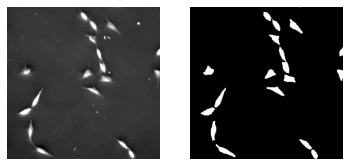

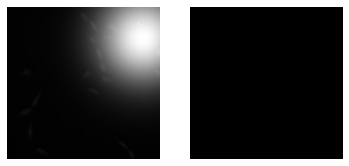

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2700.0
Accuracy                                     : 0.9311417224360448
Jaccard score                                : 0.000382746631238756
Precision                                    : 0.1092360440986602
Recall                                       : 0.0003827728898320434
Number of cells in predictions               : 590
Number of cells in masks                     : 16527


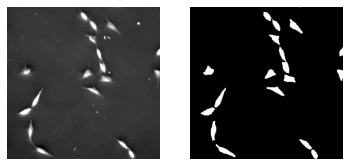

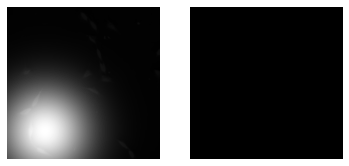

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2800.0
Accuracy                                     : 0.9311295752431832
Jaccard score                                : 0.0002237867451260551
Precision                                    : 0.08594970251059854
Recall                                       : 0.00022385052998931588
Number of cells in predictions               : 576
Number of cells in masks                     : 16527


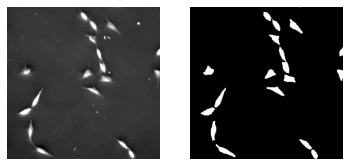

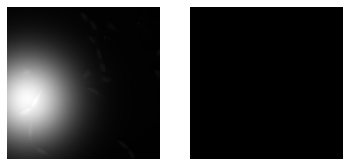

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 2900.0
Accuracy                                     : 0.9311288272633272
Jaccard score                                : 0.00016140654794128407
Precision                                    : 0.076165023783258
Recall                                       : 0.00016142431892885294
Number of cells in predictions               : 571
Number of cells in masks                     : 16527


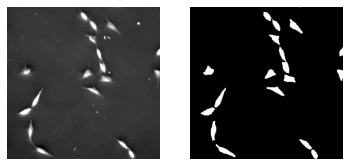

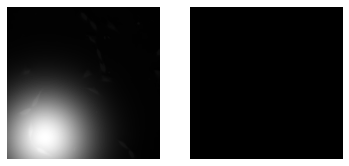

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3000.0
Accuracy                                     : 0.9311206294041053
Jaccard score                                : 6.539228699324347e-05
Precision                                    : 0.05126551381587643
Recall                                       : 6.540487363978816e-05
Number of cells in predictions               : 555
Number of cells in masks                     : 16527


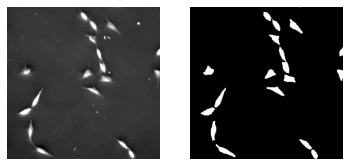

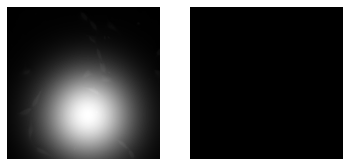

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3100.0
Accuracy                                     : 0.9311264636469823
Jaccard score                                : 0.00011575650111498143
Precision                                    : 0.04659642764827211
Recall                                       : 0.0001158058333884971
Number of cells in predictions               : 547
Number of cells in masks                     : 16527


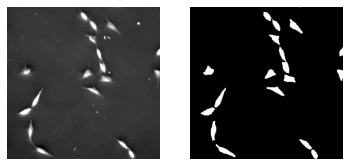

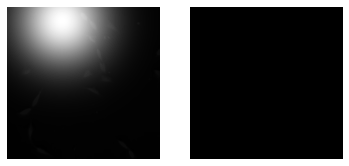

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3200.0
Accuracy                                     : 0.9311202105353861
Jaccard score                                : 3.730783104520135e-05
Precision                                    : 0.033244206773618536
Recall                                       : 3.731158665552209e-05
Number of cells in predictions               : 535
Number of cells in masks                     : 16527


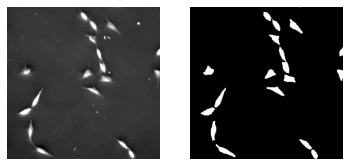

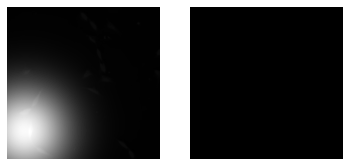

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3300.0
Accuracy                                     : 0.9311213175455729
Jaccard score                                : 5.789719466269737e-05
Precision                                    : 0.026470588235294117
Recall                                       : 5.789733331869041e-05
Number of cells in predictions               : 540
Number of cells in masks                     : 16527


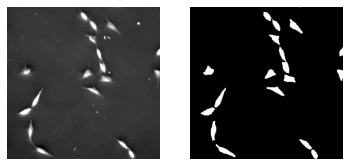

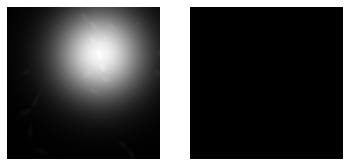

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3400.0
Accuracy                                     : 0.9311236213235294
Jaccard score                                : 7.704013129487544e-05
Precision                                    : 0.0450046685340803
Recall                                       : 7.704349884841226e-05
Number of cells in predictions               : 544
Number of cells in masks                     : 16527


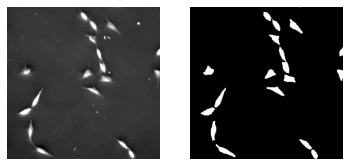

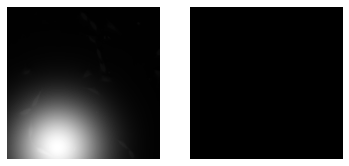

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3500.0
Accuracy                                     : 0.9311217364142923
Jaccard score                                : 4.9716427318633166e-05
Precision                                    : 0.03118409835330013
Recall                                       : 4.972180037236742e-05
Number of cells in predictions               : 533
Number of cells in masks                     : 16527


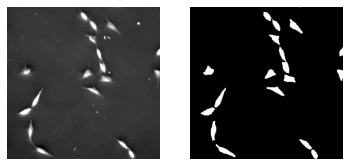

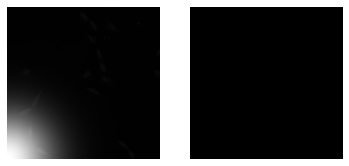

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3600.0
Accuracy                                     : 0.9311207490808824
Jaccard score                                : 2.8889691382044813e-05
Precision                                    : 0.025414781297134238
Recall                                       : 2.889089623130554e-05
Number of cells in predictions               : 529
Number of cells in masks                     : 16527


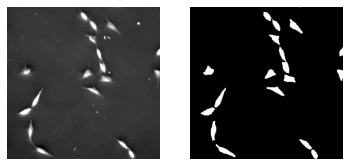

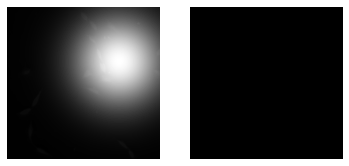

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3700.0
Accuracy                                     : 0.9311197916666667
Jaccard score                                : 1.7260036615951635e-05
Precision                                    : 0.025490196078431372
Recall                                       : 1.7260036615951635e-05
Number of cells in predictions               : 529
Number of cells in masks                     : 16527


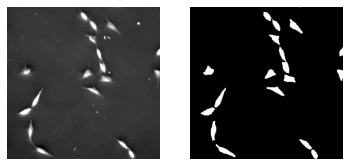

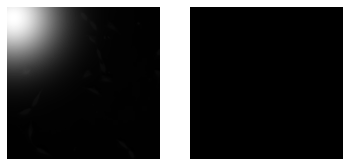

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3800.0
Accuracy                                     : 0.9311222450405944
Jaccard score                                : 5.591841620401894e-05
Precision                                    : 0.03510737628384687
Recall                                       : 5.5921372934698655e-05
Number of cells in predictions               : 539
Number of cells in masks                     : 16527


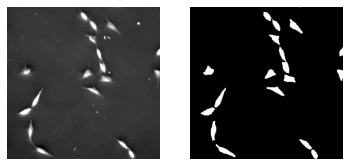

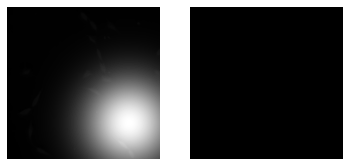

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 3900.0
Accuracy                                     : 0.9311196420706954
Jaccard score                                : 2.771570875469252e-05
Precision                                    : 0.020465686274509804
Recall                                       : 2.7722397414053373e-05
Number of cells in predictions               : 530
Number of cells in masks                     : 16527


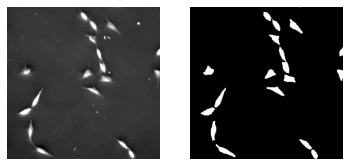

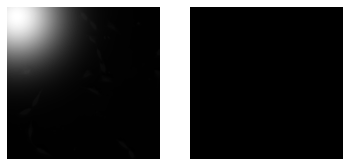

AMPLITUDE OF GAUSSIAN (BEFORE NORMALIZATION) : 4000.0
Accuracy                                     : 0.931122065525429
Jaccard score                                : 4.947208443357768e-05
Precision                                    : 0.03715170278637771
Recall                                       : 4.947277529986887e-05
Number of cells in predictions               : 538
Number of cells in masks                     : 16527


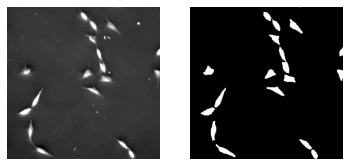

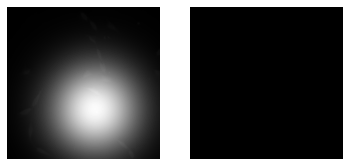

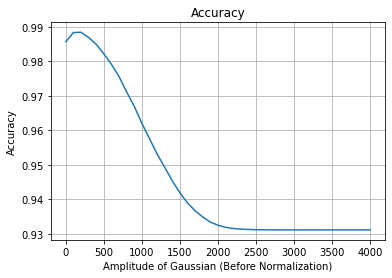

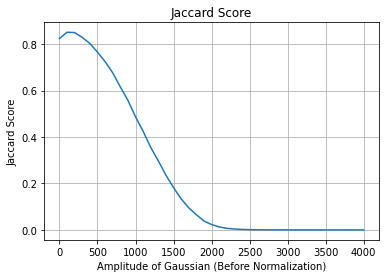

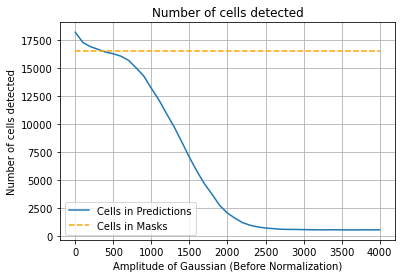

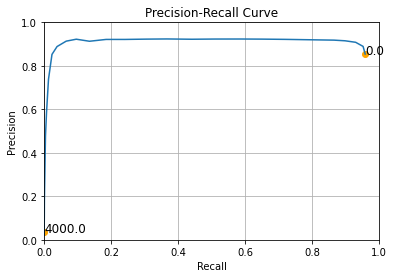

In [6]:
parameter_name = "Amplitude of Gaussian (Before Normalization)"
amplitudes = np.linspace(0, 4000, 41)
results = {}

for amplitude in amplitudes:
    added_gaussian_test_images = apply_distortion_to_all(add_gaussian, test_images, {"amplitude": amplitude})
    
    result = evaluate_model(added_gaussian_test_images, test_masks, model, number_cells_masks)
    results[amplitude] = result
    
    evaluation_summary(result, parameter_name, amplitude, test_images[0], test_masks[0], 
                       added_gaussian_test_images[0], model)
    
plot_all(results, parameter_name)

### $\bullet$ Analysis of the perturbations caused by a gaussian noise on the UNET performance

STANDARD DEVIATION                           : 0.0
Accuracy                                     : 0.9856482412300858
Jaccard score                                : 0.8237746790660512
Precision                                    : 0.8542445735274116
Recall                                       : 0.9587936872122087
Number of cells in predictions               : 18226
Number of cells in masks                     : 16527


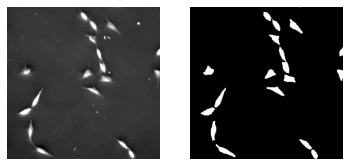

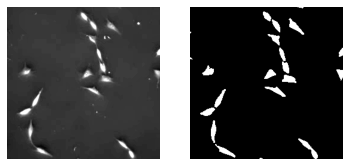

STANDARD DEVIATION                           : 5.0
Accuracy                                     : 0.979811066272212
Jaccard score                                : 0.7577621403894795
Precision                                    : 0.7975043280286712
Recall                                       : 0.9389749055340811
Number of cells in predictions               : 28666
Number of cells in masks                     : 16527


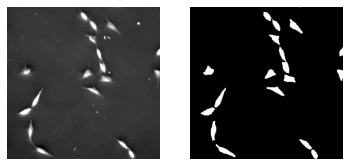

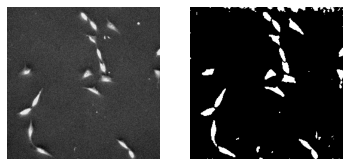

STANDARD DEVIATION                           : 10.0
Accuracy                                     : 0.968774653416054
Jaccard score                                : 0.6534413417963031
Precision                                    : 0.7102839682674632
Recall                                       : 0.8908862166678055
Number of cells in predictions               : 62652
Number of cells in masks                     : 16527


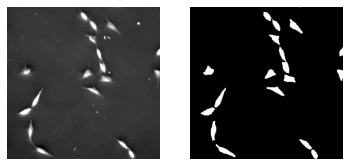

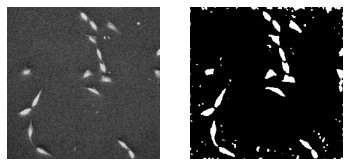

STANDARD DEVIATION                           : 15.0
Accuracy                                     : 0.9569807763193168
Jaccard score                                : 0.5694027863608345
Precision                                    : 0.6242116964917691
Recall                                       : 0.8670891038482431
Number of cells in predictions               : 89720
Number of cells in masks                     : 16527


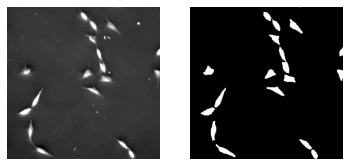

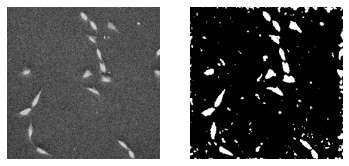

STANDARD DEVIATION                           : 20.0
Accuracy                                     : 0.9471022661994485
Jaccard score                                : 0.5121967145428016
Precision                                    : 0.5655636024744705
Recall                                       : 0.8459131675900432
Number of cells in predictions               : 105990
Number of cells in masks                     : 16527


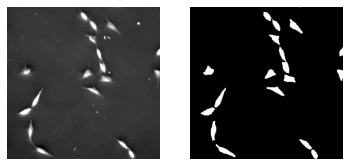

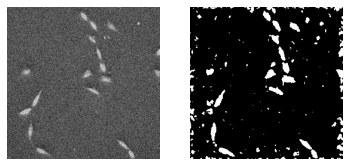

STANDARD DEVIATION                           : 25.0
Accuracy                                     : 0.9394959393669577
Jaccard score                                : 0.47161716935722076
Precision                                    : 0.5273936059715135
Recall                                       : 0.8201582183799762
Number of cells in predictions               : 115742
Number of cells in masks                     : 16527


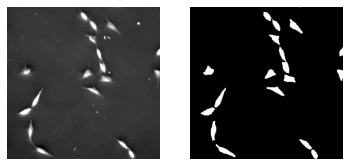

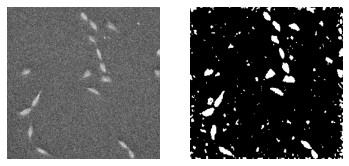

STANDARD DEVIATION                           : 30.0
Accuracy                                     : 0.9318976607977175
Jaccard score                                : 0.435824479443672
Precision                                    : 0.4925239196434472
Recall                                       : 0.7971010231528421
Number of cells in predictions               : 127992
Number of cells in masks                     : 16527


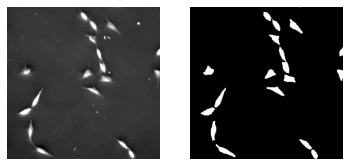

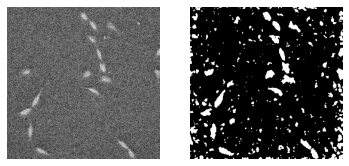

STANDARD DEVIATION                           : 35.0
Accuracy                                     : 0.9250246534160539
Jaccard score                                : 0.40627058044180153
Precision                                    : 0.4635647033374613
Recall                                       : 0.7741340558109401
Number of cells in predictions               : 139216
Number of cells in masks                     : 16527


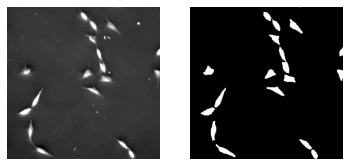

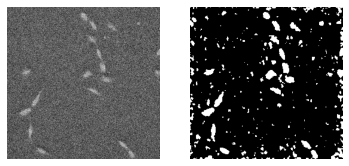

STANDARD DEVIATION                           : 40.0
Accuracy                                     : 0.9169026393516391
Jaccard score                                : 0.3764336905586518
Precision                                    : 0.4325786173629575
Recall                                       : 0.7545416923997058
Number of cells in predictions               : 153334
Number of cells in masks                     : 16527


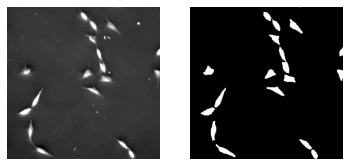

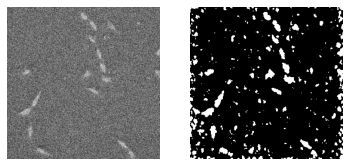

STANDARD DEVIATION                           : 45.0
Accuracy                                     : 0.9099042406269148
Jaccard score                                : 0.35095104644052066
Precision                                    : 0.40724340826826294
Recall                                       : 0.730836286669971
Number of cells in predictions               : 164808
Number of cells in masks                     : 16527


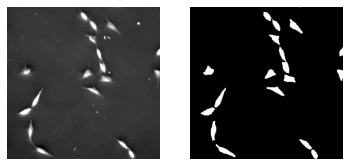

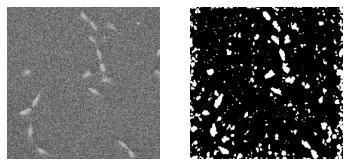

STANDARD DEVIATION                           : 50.0
Accuracy                                     : 0.9026285208907782
Jaccard score                                : 0.3286275011673996
Precision                                    : 0.38361718984358567
Recall                                       : 0.7127539566481024
Number of cells in predictions               : 175961
Number of cells in masks                     : 16527


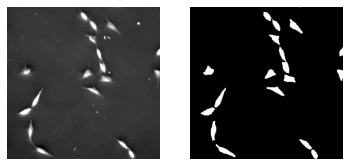

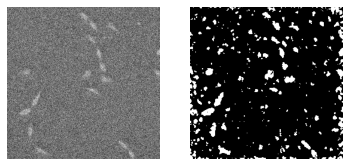

STANDARD DEVIATION                           : 55.0
Accuracy                                     : 0.8930734671798407
Jaccard score                                : 0.3046845373446528
Precision                                    : 0.3563265145010582
Recall                                       : 0.6975043221143148
Number of cells in predictions               : 190616
Number of cells in masks                     : 16527


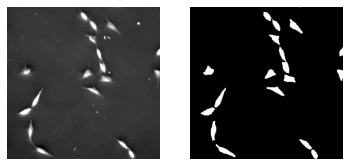

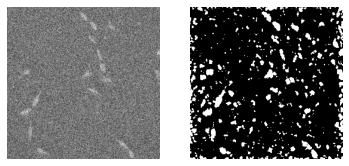

STANDARD DEVIATION                           : 60.0
Accuracy                                     : 0.8863598094267003
Jaccard score                                : 0.28653643156100495
Precision                                    : 0.3376417172783707
Recall                                       : 0.6764632630284704
Number of cells in predictions               : 200048
Number of cells in masks                     : 16527


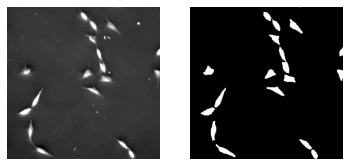

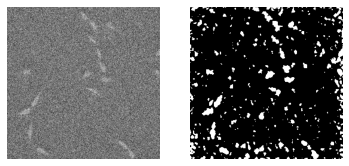

STANDARD DEVIATION                           : 65.0
Accuracy                                     : 0.8795765297085631
Jaccard score                                : 0.2694172402386721
Precision                                    : 0.3191475786495029
Recall                                       : 0.657996197024888
Number of cells in predictions               : 208529
Number of cells in masks                     : 16527


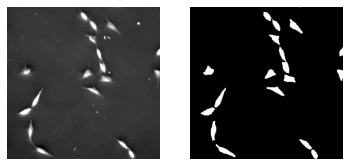

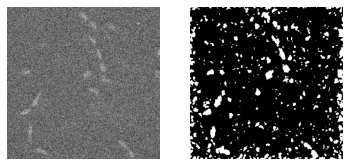

STANDARD DEVIATION                           : 70.0
Accuracy                                     : 0.8749988929898131
Jaccard score                                : 0.256389088997084
Precision                                    : 0.3058481401579428
Recall                                       : 0.6382736694458392
Number of cells in predictions               : 215649
Number of cells in masks                     : 16527


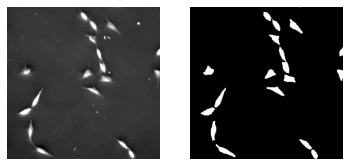

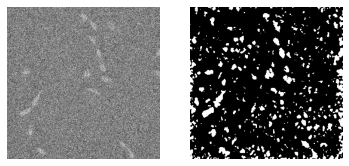

STANDARD DEVIATION                           : 75.0
Accuracy                                     : 0.868617457969516
Jaccard score                                : 0.2407383495039504
Precision                                    : 0.2892515328747276
Recall                                       : 0.6160383198055467
Number of cells in predictions               : 222879
Number of cells in masks                     : 16527


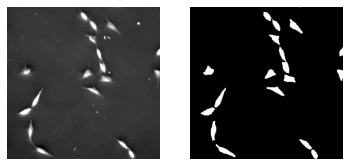

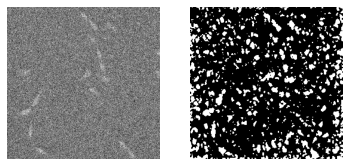

STANDARD DEVIATION                           : 80.0
Accuracy                                     : 0.8643797332165288
Jaccard score                                : 0.23028337490830925
Precision                                    : 0.2787676182101084
Recall                                       : 0.5994915428818872
Number of cells in predictions               : 228170
Number of cells in masks                     : 16527


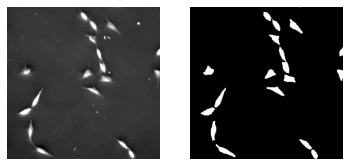

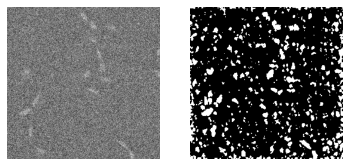

STANDARD DEVIATION                           : 85.0
Accuracy                                     : 0.8588930616191789
Jaccard score                                : 0.21712663512994246
Precision                                    : 0.26381164894707754
Recall                                       : 0.5792844631335462
Number of cells in predictions               : 234430
Number of cells in masks                     : 16527


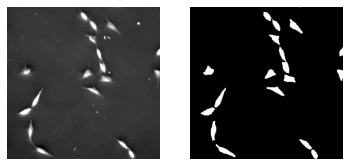

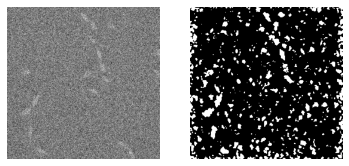

STANDARD DEVIATION                           : 90.0
Accuracy                                     : 0.8547156838809743
Jaccard score                                : 0.20657909296039606
Precision                                    : 0.2532864244683406
Recall                                       : 0.5591615103868904
Number of cells in predictions               : 239346
Number of cells in masks                     : 16527


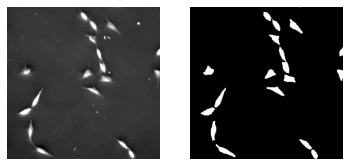

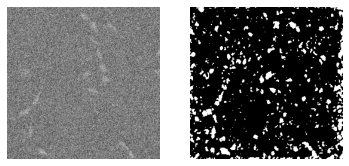

STANDARD DEVIATION                           : 95.0
Accuracy                                     : 0.8539196837182138
Jaccard score                                : 0.19965019850637009
Precision                                    : 0.2478267442493842
Recall                                       : 0.5386298230793956
Number of cells in predictions               : 239316
Number of cells in masks                     : 16527


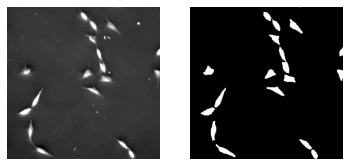

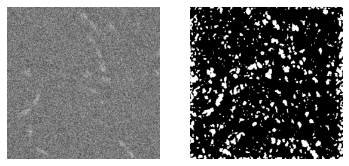

STANDARD DEVIATION                           : 100.0
Accuracy                                     : 0.8479939778645833
Jaccard score                                : 0.18949818655656198
Precision                                    : 0.2349386981250253
Recall                                       : 0.5258212782690282
Number of cells in predictions               : 247315
Number of cells in masks                     : 16527


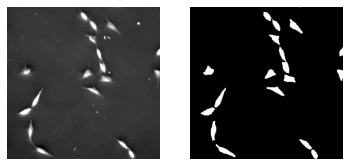

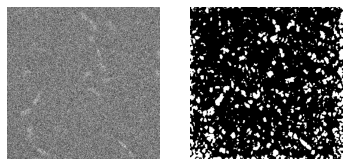

STANDARD DEVIATION                           : 105.0
Accuracy                                     : 0.8454553342333027
Jaccard score                                : 0.18119250553601016
Precision                                    : 0.22686189164462708
Recall                                       : 0.5063278756467717
Number of cells in predictions               : 249457
Number of cells in masks                     : 16527


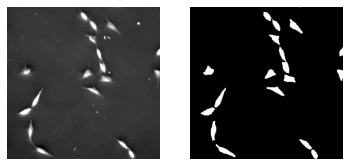

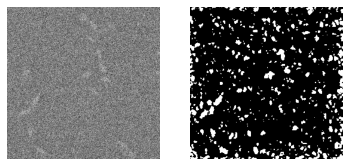

STANDARD DEVIATION                           : 110.0
Accuracy                                     : 0.8432545082241881
Jaccard score                                : 0.17441002637129144
Precision                                    : 0.21869896334550712
Recall                                       : 0.4914382038528429
Number of cells in predictions               : 252253
Number of cells in masks                     : 16527


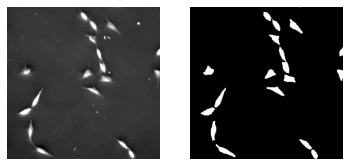

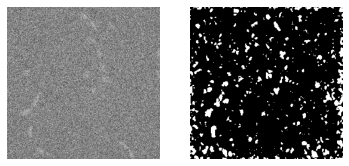

STANDARD DEVIATION                           : 115.0
Accuracy                                     : 0.8408031089633119
Jaccard score                                : 0.16795893826489103
Precision                                    : 0.21220084297975791
Recall                                       : 0.47656434973041745
Number of cells in predictions               : 254909
Number of cells in masks                     : 16527


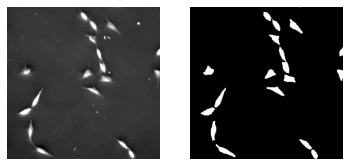

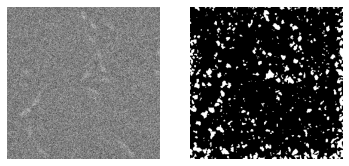

STANDARD DEVIATION                           : 120.0
Accuracy                                     : 0.8396341959635417
Jaccard score                                : 0.16239795162493945
Precision                                    : 0.20794945618910546
Recall                                       : 0.45987050222781045
Number of cells in predictions               : 254814
Number of cells in masks                     : 16527


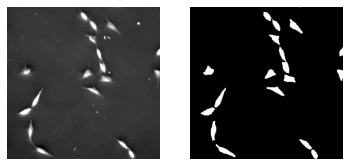

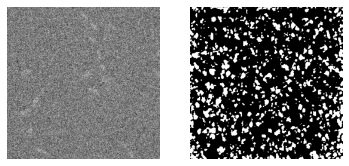

STANDARD DEVIATION                           : 125.0
Accuracy                                     : 0.8361256318933824
Jaccard score                                : 0.1556443033178401
Precision                                    : 0.19843749683623077
Recall                                       : 0.4480455437405008
Number of cells in predictions               : 259756
Number of cells in masks                     : 16527


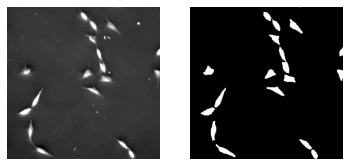

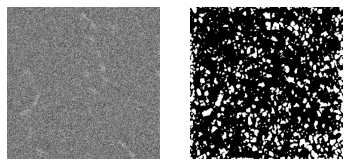

STANDARD DEVIATION                           : 130.0
Accuracy                                     : 0.8360206155215992
Jaccard score                                : 0.1510510011403234
Precision                                    : 0.19408288436871093
Recall                                       : 0.43314182204309587
Number of cells in predictions               : 260007
Number of cells in masks                     : 16527


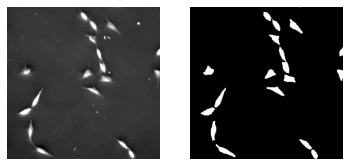

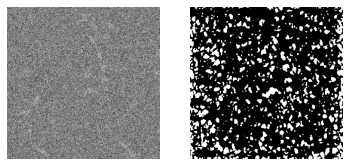

STANDARD DEVIATION                           : 135.0
Accuracy                                     : 0.8322617773916207
Jaccard score                                : 0.14525221415354933
Precision                                    : 0.18754008830429206
Recall                                       : 0.42348206577281977
Number of cells in predictions               : 262949
Number of cells in masks                     : 16527


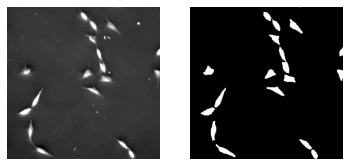

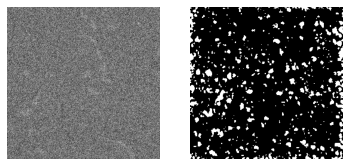

STANDARD DEVIATION                           : 140.0
Accuracy                                     : 0.8320686489928002
Jaccard score                                : 0.14177640369468303
Precision                                    : 0.18344145983784518
Recall                                       : 0.41280179279374174
Number of cells in predictions               : 263590
Number of cells in masks                     : 16527


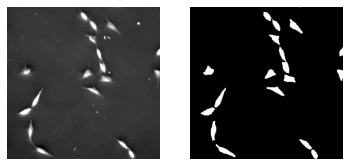

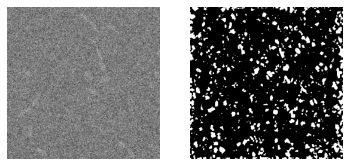

STANDARD DEVIATION                           : 145.0
Accuracy                                     : 0.8324465284160539
Jaccard score                                : 0.13731050062582364
Precision                                    : 0.17969774628379137
Recall                                       : 0.3965937800948976
Number of cells in predictions               : 261900
Number of cells in masks                     : 16527


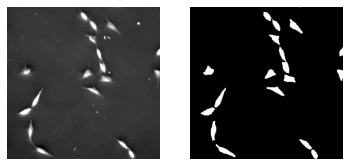

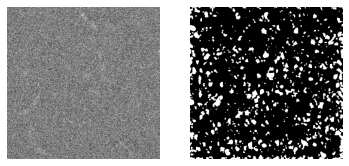

STANDARD DEVIATION                           : 150.0
Accuracy                                     : 0.8286327586454504
Jaccard score                                : 0.1328737335323807
Precision                                    : 0.1733224176122009
Recall                                       : 0.3905925292296632
Number of cells in predictions               : 266938
Number of cells in masks                     : 16527


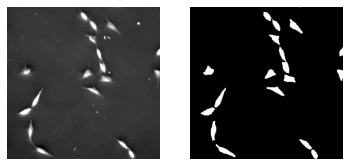

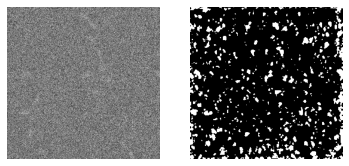

STANDARD DEVIATION                           : 155.0
Accuracy                                     : 0.8280061908796722
Jaccard score                                : 0.12905986785292636
Precision                                    : 0.1699960235481468
Recall                                       : 0.378917107121633
Number of cells in predictions               : 267783
Number of cells in masks                     : 16527


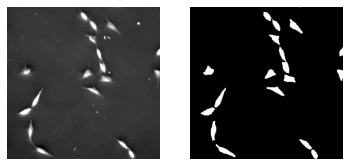

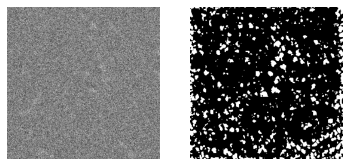

STANDARD DEVIATION                           : 160.0
Accuracy                                     : 0.8276001574946384
Jaccard score                                : 0.12623355519188137
Precision                                    : 0.1663851945492564
Recall                                       : 0.3710527694486691
Number of cells in predictions               : 267813
Number of cells in masks                     : 16527


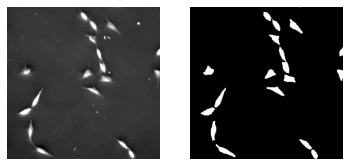

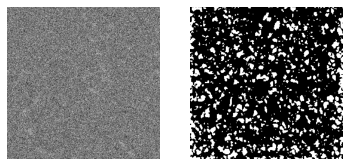

STANDARD DEVIATION                           : 165.0
Accuracy                                     : 0.8264081767961091
Jaccard score                                : 0.12284495310473528
Precision                                    : 0.16266736881938762
Recall                                       : 0.3629217145447924
Number of cells in predictions               : 268649
Number of cells in masks                     : 16527


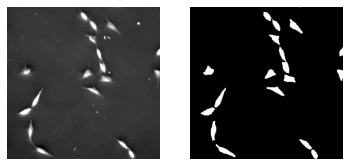

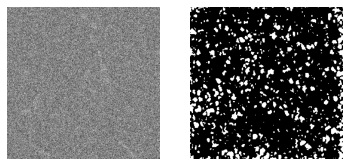

STANDARD DEVIATION                           : 170.0
Accuracy                                     : 0.8243785184972426
Jaccard score                                : 0.11943468053473008
Precision                                    : 0.15835113488447386
Recall                                       : 0.3553827217799652
Number of cells in predictions               : 270044
Number of cells in masks                     : 16527


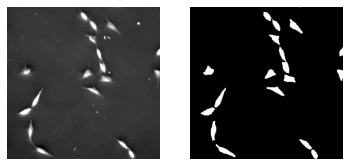

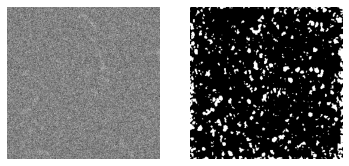

STANDARD DEVIATION                           : 175.0
Accuracy                                     : 0.8225487802542892
Jaccard score                                : 0.11773750499245905
Precision                                    : 0.1554459427635703
Recall                                       : 0.3527155884505999
Number of cells in predictions               : 272487
Number of cells in masks                     : 16527


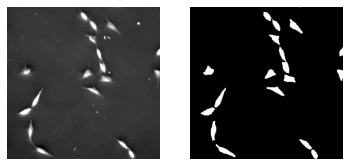

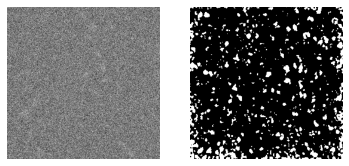

STANDARD DEVIATION                           : 180.0
Accuracy                                     : 0.8252480301202513
Jaccard score                                : 0.11413520436139958
Precision                                    : 0.1528393745194303
Recall                                       : 0.3362250635796477
Number of cells in predictions               : 268992
Number of cells in masks                     : 16527


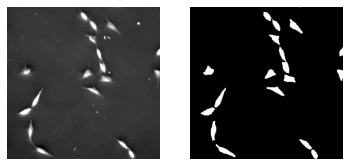

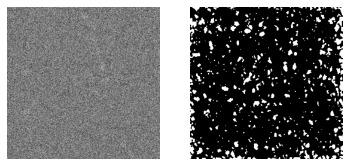

STANDARD DEVIATION                           : 185.0
Accuracy                                     : 0.820894069297641
Jaccard score                                : 0.11204695748244847
Precision                                    : 0.14894329145341448
Recall                                       : 0.3372027967846948
Number of cells in predictions               : 274699
Number of cells in masks                     : 16527


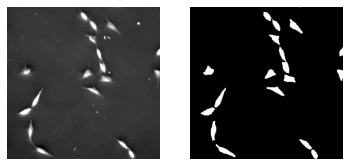

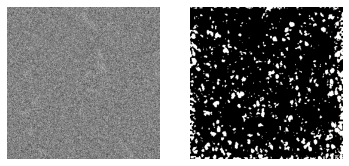

STANDARD DEVIATION                           : 190.0
Accuracy                                     : 0.823328384698606
Jaccard score                                : 0.10908795497937453
Precision                                    : 0.14700648501824298
Recall                                       : 0.3221510829501121
Number of cells in predictions               : 271483
Number of cells in masks                     : 16527


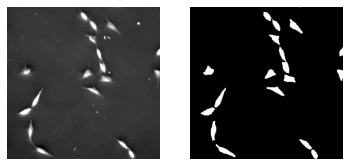

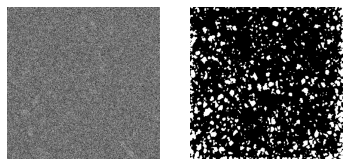

STANDARD DEVIATION                           : 195.0
Accuracy                                     : 0.8238353953642004
Jaccard score                                : 0.10727939259282028
Precision                                    : 0.1451870910686443
Recall                                       : 0.3165863135402755
Number of cells in predictions               : 270911
Number of cells in masks                     : 16527


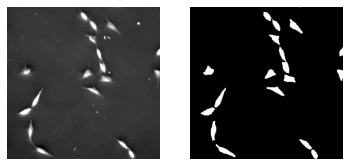

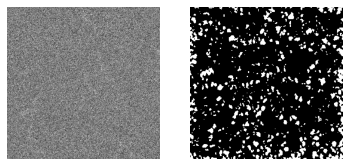

STANDARD DEVIATION                           : 200.0
Accuracy                                     : 0.8207240385167739
Jaccard score                                : 0.10613849231913589
Precision                                    : 0.14303024218383673
Recall                                       : 0.31748757574255143
Number of cells in predictions               : 274333
Number of cells in masks                     : 16527


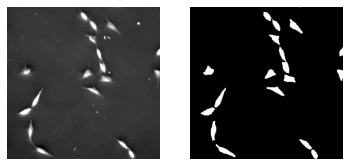

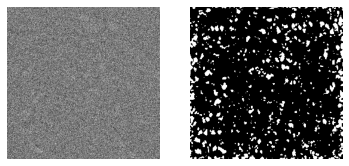

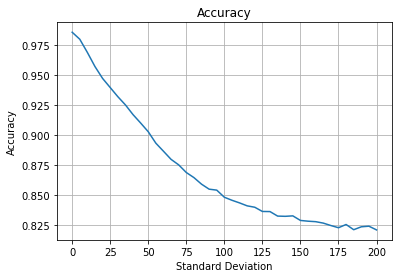

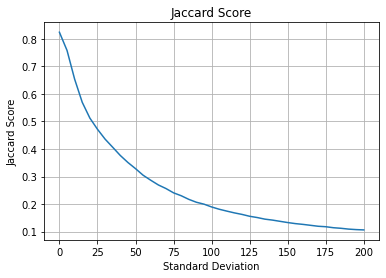

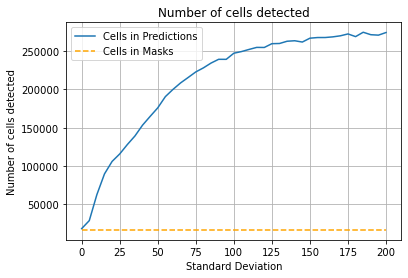

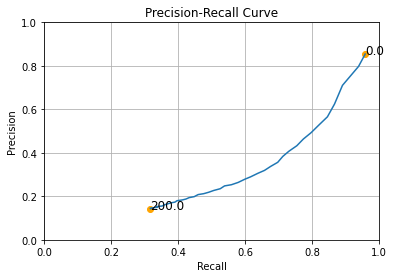

In [7]:
parameter_name = "Standard Deviation"
mean = 0
sigmas = np.linspace(0, 200, 41)
results = {}
for sigma in sigmas:
    noisy_test_images = apply_distortion_to_all(add_gaussian_noise, test_images, {"mean": mean, "sigma": sigma})

    result = evaluate_model(noisy_test_images, test_masks, model, number_cells_masks)
    results[sigma] = result
    
    evaluation_summary(result, parameter_name, sigma, test_images[0], test_masks[0], noisy_test_images[0], model)
        
plot_all(results, parameter_name)

### $\bullet$ Analysis of the perturbations caused by a rescaling of the images on the UNET performance

ZOOMING FACTOR FROM PATCHES                  : 0.5
Accuracy                                     : 0.9856365129059437
Jaccard score                                : 0.37825688730676965
Precision                                    : 0.5520036650815193
Recall                                       : 0.5395554833816598
Number of cells in predictions               : 10539
Number of cells in masks                     : 14951


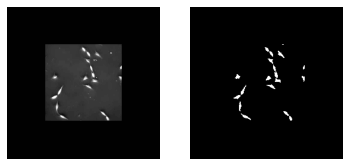

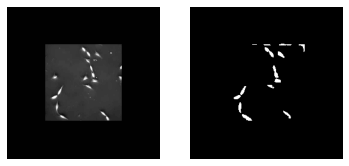

ZOOMING FACTOR FROM PATCHES                  : 0.6
Accuracy                                     : 0.9843766754748775
Jaccard score                                : 0.5497345662613538
Precision                                    : 0.6476017578720354
Recall                                       : 0.7797677109120641
Number of cells in predictions               : 13500
Number of cells in masks                     : 15541


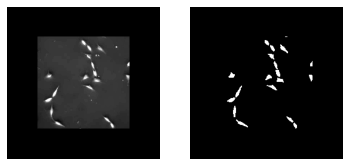

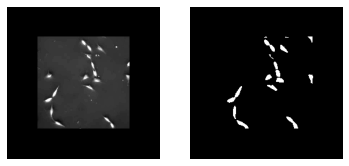

ZOOMING FACTOR FROM PATCHES                  : 0.7
Accuracy                                     : 0.9839474247951133
Jaccard score                                : 0.6523496558365873
Precision                                    : 0.7012830319333182
Recall                                       : 0.9025168834534266
Number of cells in predictions               : 15104
Number of cells in masks                     : 15823


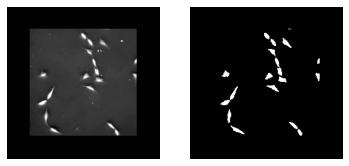

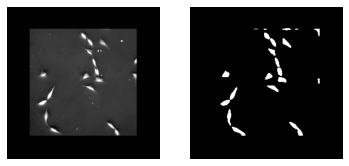

ZOOMING FACTOR FROM PATCHES                  : 0.8
Accuracy                                     : 0.9862910551183364
Jaccard score                                : 0.7511977419951115
Precision                                    : 0.7895060859996598
Recall                                       : 0.9397306671830414
Number of cells in predictions               : 16205
Number of cells in masks                     : 16037


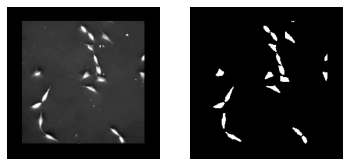

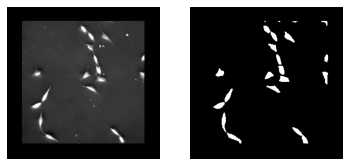

ZOOMING FACTOR FROM PATCHES                  : 0.9
Accuracy                                     : 0.9842631919711244
Jaccard score                                : 0.768974721485775
Precision                                    : 0.8054912562785361
Recall                                       : 0.944714099547547
Number of cells in predictions               : 17943
Number of cells in masks                     : 16395


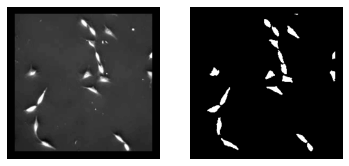

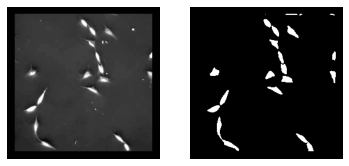

ZOOMING FACTOR FROM PATCHES                  : 1.0
Accuracy                                     : 0.990330026663986
Jaccard score                                : 0.875118192780075
Precision                                    : 0.9189385201988987
Recall                                       : 0.9486034687320016
Number of cells in predictions               : 17042
Number of cells in masks                     : 16527


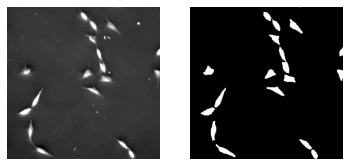

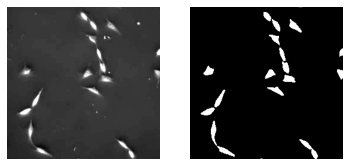

ZOOMING FACTOR FROM PATCHES                  : 1.1
Accuracy                                     : 0.9881516101313572
Jaccard score                                : 0.8446081146946235
Precision                                    : 0.9214519135704926
Recall                                       : 0.9103292375996133
Number of cells in predictions               : 14924
Number of cells in masks                     : 14182


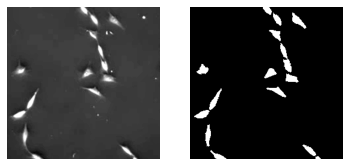

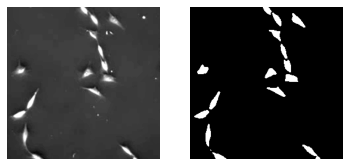

ZOOMING FACTOR FROM PATCHES                  : 1.2000000000000002
Accuracy                                     : 0.9871836643592984
Jaccard score                                : 0.8265358498229313
Precision                                    : 0.937120655247028
Recall                                       : 0.8753812022346498
Number of cells in predictions               : 13183
Number of cells in masks                     : 12135


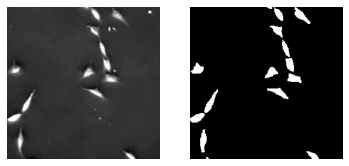

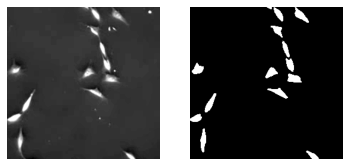

ZOOMING FACTOR FROM PATCHES                  : 1.3
Accuracy                                     : 0.9849432253370098
Jaccard score                                : 0.7917479312824437
Precision                                    : 0.942244312488452
Recall                                       : 0.8325782513682543
Number of cells in predictions               : 11668
Number of cells in masks                     : 10587


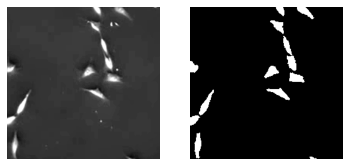

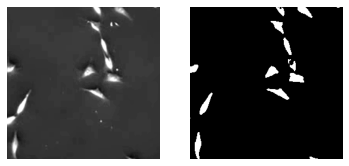

ZOOMING FACTOR FROM PATCHES                  : 1.4
Accuracy                                     : 0.9821850645775888
Jaccard score                                : 0.7475960102807852
Precision                                    : 0.947643555171518
Recall                                       : 0.7809382731580825
Number of cells in predictions               : 10664
Number of cells in masks                     : 9313


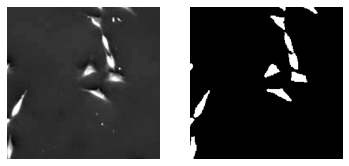

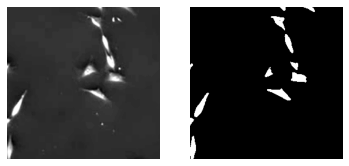

ZOOMING FACTOR FROM PATCHES                  : 1.5
Accuracy                                     : 0.979110657935049
Jaccard score                                : 0.7003410355230236
Precision                                    : 0.9445503260023306
Recall                                       : 0.7318295574975818
Number of cells in predictions               : 9824
Number of cells in masks                     : 8785


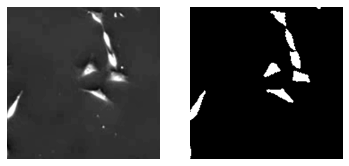

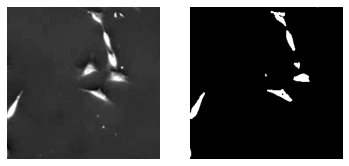

ZOOMING FACTOR FROM PATCHES                  : 1.6
Accuracy                                     : 0.9758379169538909
Jaccard score                                : 0.6519303412892591
Precision                                    : 0.9480196047194077
Recall                                       : 0.6777315439202223
Number of cells in predictions               : 9155
Number of cells in masks                     : 7409


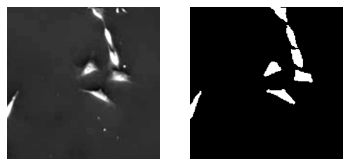

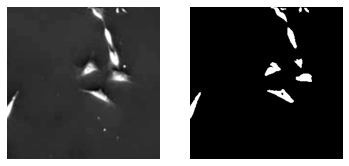

ZOOMING FACTOR FROM PATCHES                  : 1.7000000000000002
Accuracy                                     : 0.972849946863511
Jaccard score                                : 0.610193239376092
Precision                                    : 0.9450767008052362
Recall                                       : 0.6342752880394212
Number of cells in predictions               : 8613
Number of cells in masks                     : 6748


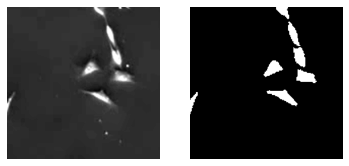

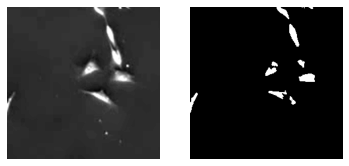

ZOOMING FACTOR FROM PATCHES                  : 1.8
Accuracy                                     : 0.9706582162894455
Jaccard score                                : 0.5842912146590153
Precision                                    : 0.942483560992639
Recall                                       : 0.6068202501138615
Number of cells in predictions               : 8210
Number of cells in masks                     : 6198


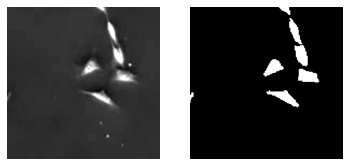

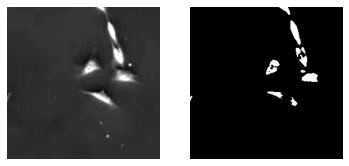

ZOOMING FACTOR FROM PATCHES                  : 1.9000000000000001
Accuracy                                     : 0.9689551259957108
Jaccard score                                : 0.5598112545811228
Precision                                    : 0.9385975606132505
Recall                                       : 0.5817048484108978
Number of cells in predictions               : 7821
Number of cells in masks                     : 5879


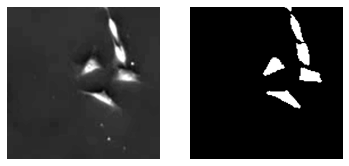

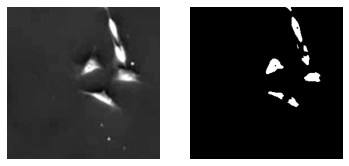

ZOOMING FACTOR FROM PATCHES                  : 2.0
Accuracy                                     : 0.9673174988989737
Jaccard score                                : 0.5397405617121938
Precision                                    : 0.9358594149736158
Recall                                       : 0.5617839626464879
Number of cells in predictions               : 7616
Number of cells in masks                     : 5053


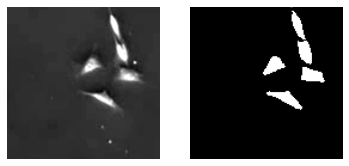

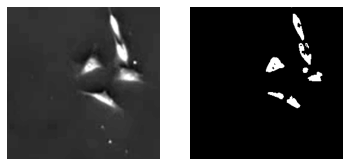

ZOOMING FACTOR FROM PATCHES                  : 2.5
Accuracy                                     : 0.9635139016544118
Jaccard score                                : 0.4816243639214076
Precision                                    : 0.9057589261630551
Recall                                       : 0.5022997902301959
Number of cells in predictions               : 6155
Number of cells in masks                     : 4052


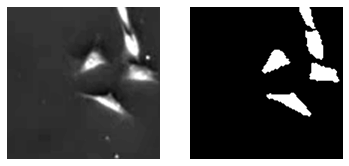

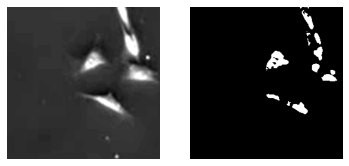

ZOOMING FACTOR FROM PATCHES                  : 3.0
Accuracy                                     : 0.9592359954235601
Jaccard score                                : 0.40848797296027667
Precision                                    : 0.8592328208168261
Recall                                       : 0.427607369716358
Number of cells in predictions               : 4999
Number of cells in masks                     : 2865


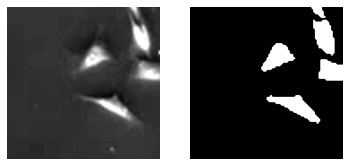

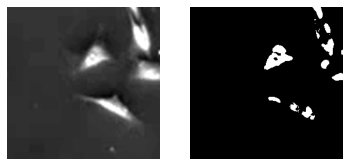

ZOOMING FACTOR FROM PATCHES                  : 3.5
Accuracy                                     : 0.9542963962928922
Jaccard score                                : 0.3297622909910463
Precision                                    : 0.8097110986811743
Recall                                       : 0.345794074293633
Number of cells in predictions               : 4284
Number of cells in masks                     : 2349


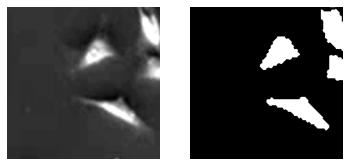

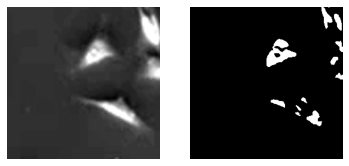

ZOOMING FACTOR FROM PATCHES                  : 4.0
Accuracy                                     : 0.9492484597598805
Jaccard score                                : 0.25803882130920064
Precision                                    : 0.7651830429119016
Recall                                       : 0.26830642278685024
Number of cells in predictions               : 3585
Number of cells in masks                     : 1994


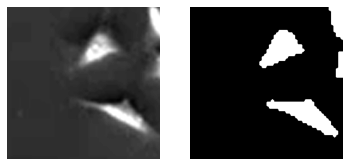

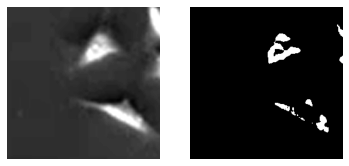

ZOOMING FACTOR FROM PATCHES                  : 4.5
Accuracy                                     : 0.945320727778416
Jaccard score                                : 0.19688375063200406
Precision                                    : 0.715217481803882
Recall                                       : 0.20259677138471732
Number of cells in predictions               : 3060
Number of cells in masks                     : 1775


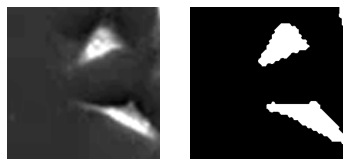

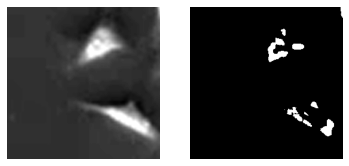

ZOOMING FACTOR FROM PATCHES                  : 5.0
Accuracy                                     : 0.9413067088407628
Jaccard score                                : 0.1425663740652893
Precision                                    : 0.6275907320668564
Recall                                       : 0.14760183603756732
Number of cells in predictions               : 2650
Number of cells in masks                     : 1569


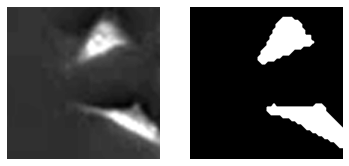

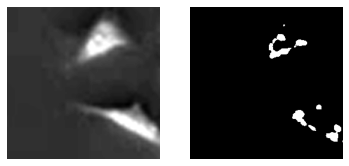

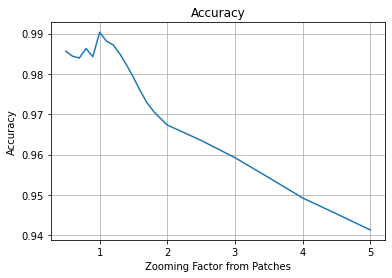

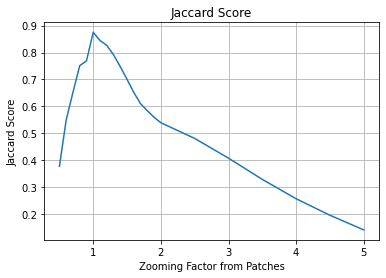

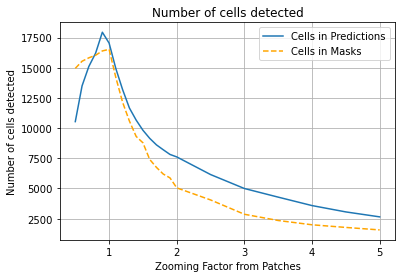

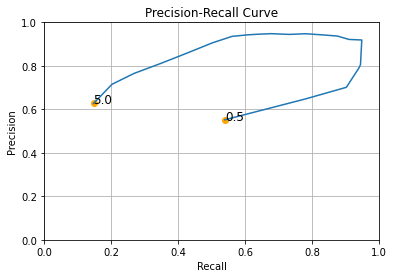

In [8]:
parameter_name = "Zooming Factor from Patches"
zooms = np.r_[np.linspace(0.5, 2, 15, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    zoomed_test_images = apply_distortion_to_all(zoom_image, test_images, {"zoom_factor": zoom})
    zoomed_test_masks  = apply_distortion_to_all(zoom_image, test_masks , {"zoom_factor": zoom, "val_padding": 0})

    result = evaluate_model(zoomed_test_images, zoomed_test_masks, model)
    results[zoom] = result
    
    evaluation_summary(result, parameter_name, zoom, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(results, parameter_name)

### $\bullet$ Get full input images from dataset

In [9]:
test_full_images, test_full_masks = get_dataset_from_folders(test_input_path, test_output_path)
full_images_shape = (*test_full_images[0].shape, 1)

print(f'Test set contains {len(test_full_images)} images of shape {full_images_shape}.')

Test set contains 85 images of shape (576, 720, 1).


### $\bullet$ Analysis of the perturbations caused by havind different sizes of cells on the UNET performance

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.5
Accuracy                                     : 0.9535703472062653
Jaccard score                                : 0.464659571032048
Precision                                    : 0.6889752447626727
Recall                                       : 0.5904068544562566
Number of cells in predictions               : 40718
Number of cells in masks                     : 56191


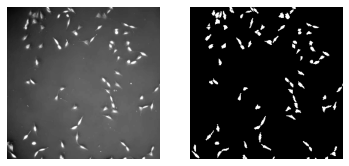

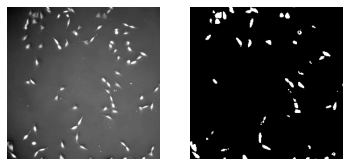

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.6
Accuracy                                     : 0.9703077428481158
Jaccard score                                : 0.6607156462918704
Precision                                    : 0.7745881583245287
Recall                                       : 0.8186926644746824
Number of cells in predictions               : 34566
Number of cells in masks                     : 40617


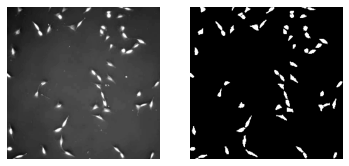

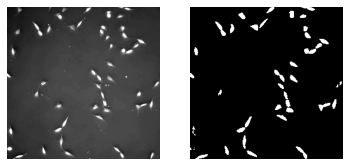

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.7
Accuracy                                     : 0.9798647113874847
Jaccard score                                : 0.7623726616681492
Precision                                    : 0.8128833355781216
Recall                                       : 0.9251967464517131
Number of cells in predictions               : 28233
Number of cells in masks                     : 30809


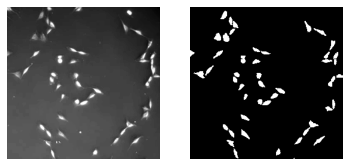

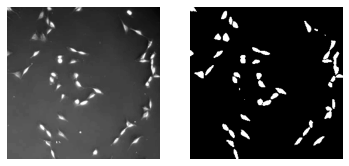

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.8
Accuracy                                     : 0.9849466361251532
Jaccard score                                : 0.8128346709628241
Precision                                    : 0.8510503831732994
Recall                                       : 0.9480854905817704
Number of cells in predictions               : 23309
Number of cells in masks                     : 24085


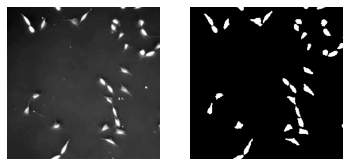

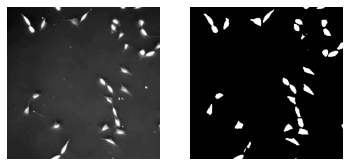

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 0.9
Accuracy                                     : 0.9873579735849418
Jaccard score                                : 0.8347434944322345
Precision                                    : 0.876803013499408
Recall                                       : 0.9459845416230598
Number of cells in predictions               : 19018
Number of cells in masks                     : 19068


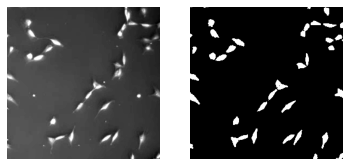

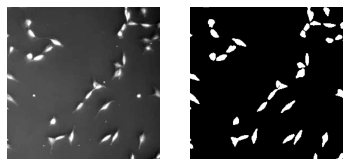

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.0
Accuracy                                     : 0.9902668373257506
Jaccard score                                : 0.8727000002877566
Precision                                    : 0.9161756271073315
Recall                                       : 0.948785023054368
Number of cells in predictions               : 17138
Number of cells in masks                     : 16554


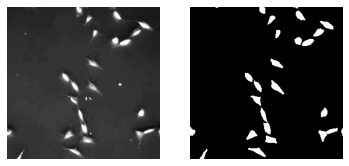

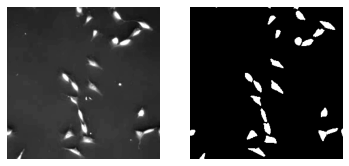

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.1
Accuracy                                     : 0.9877373446937369
Jaccard score                                : 0.8360461115767903
Precision                                    : 0.9149153550044954
Recall                                       : 0.9068518905378125
Number of cells in predictions               : 17010
Number of cells in masks                     : 15851


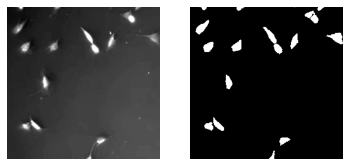

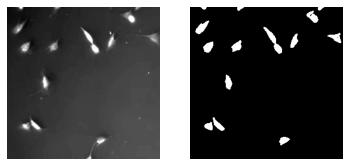

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.2000000000000002
Accuracy                                     : 0.9859410903033088
Jaccard score                                : 0.8127912139152064
Precision                                    : 0.9250188777753973
Recall                                       : 0.8708316093843591
Number of cells in predictions               : 19802
Number of cells in masks                     : 17923


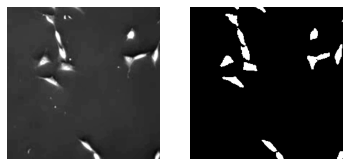

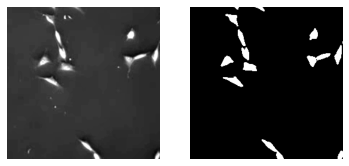

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.3
Accuracy                                     : 0.9837488870059743
Jaccard score                                : 0.7771327887663027
Precision                                    : 0.927089692675917
Recall                                       : 0.8284366718500318
Number of cells in predictions               : 19477
Number of cells in masks                     : 17029


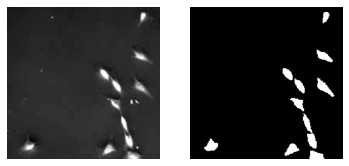

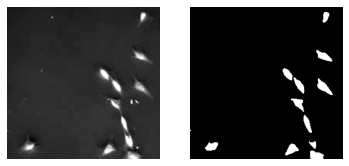

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.4
Accuracy                                     : 0.9806353849523207
Jaccard score                                : 0.7302911772600621
Precision                                    : 0.9318484628657463
Recall                                       : 0.7723820617451537
Number of cells in predictions               : 21474
Number of cells in masks                     : 18205


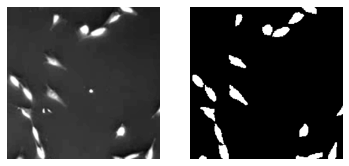

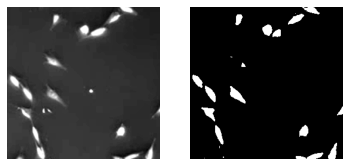

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.5
Accuracy                                     : 0.9773735623399751
Jaccard score                                : 0.686710124043859
Precision                                    : 0.9364417140175738
Recall                                       : 0.7224359227546275
Number of cells in predictions               : 23595
Number of cells in masks                     : 19363


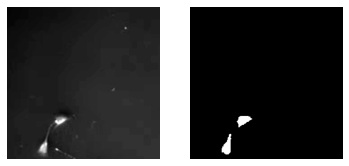

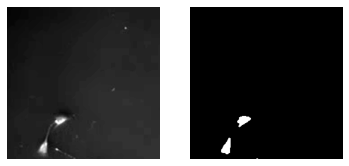

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.6
Accuracy                                     : 0.9749089858111213
Jaccard score                                : 0.6383857339594188
Precision                                    : 0.9311836214045534
Recall                                       : 0.6719353613925798
Number of cells in predictions               : 24789
Number of cells in masks                     : 19470


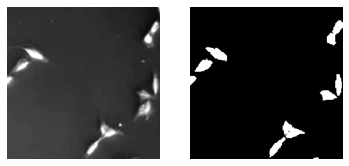

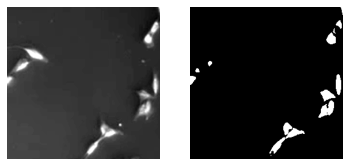

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.7000000000000002
Accuracy                                     : 0.9716430165409262
Jaccard score                                : 0.6026554011728277
Precision                                    : 0.927129929112245
Recall                                       : 0.6338727783266523
Number of cells in predictions               : 26651
Number of cells in masks                     : 20053


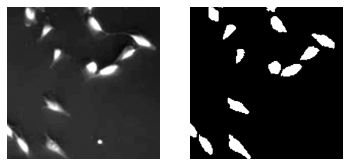

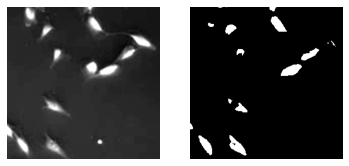

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.8
Accuracy                                     : 0.9692991907456342
Jaccard score                                : 0.5732068693955837
Precision                                    : 0.9284797411683015
Recall                                       : 0.6010496402625227
Number of cells in predictions               : 28576
Number of cells in masks                     : 20719


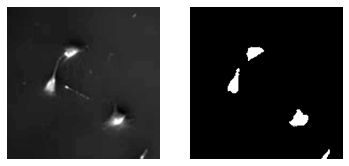

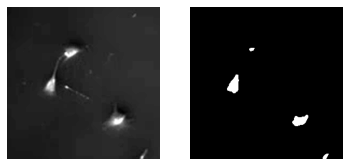

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 1.9000000000000001
Accuracy                                     : 0.9680702385085318
Jaccard score                                : 0.5477378013699354
Precision                                    : 0.9196215256172866
Recall                                       : 0.576675069751953
Number of cells in predictions               : 30764
Number of cells in masks                     : 21372


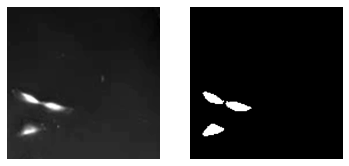

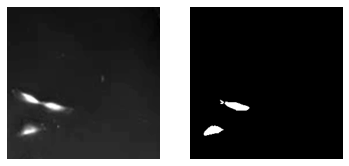

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 2.0
Accuracy                                     : 0.9657966595818015
Jaccard score                                : 0.539302442231282
Precision                                    : 0.9135554670201248
Recall                                       : 0.5700667787689347
Number of cells in predictions               : 33066
Number of cells in masks                     : 21710


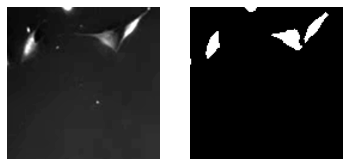

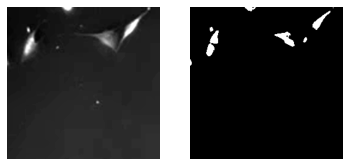

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 2.5
Accuracy                                     : 0.9614686899774934
Jaccard score                                : 0.47457660106225036
Precision                                    : 0.8873159411858492
Recall                                       : 0.5021169610407231
Number of cells in predictions               : 41281
Number of cells in masks                     : 24669


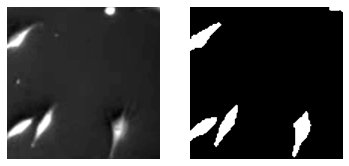

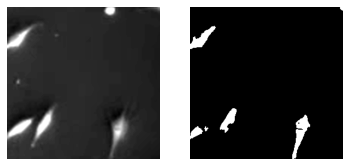

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 3.0
Accuracy                                     : 0.9567358152785168
Jaccard score                                : 0.4018230891006282
Precision                                    : 0.8411875123204458
Recall                                       : 0.428235613425094
Number of cells in predictions               : 48816
Number of cells in masks                     : 27758


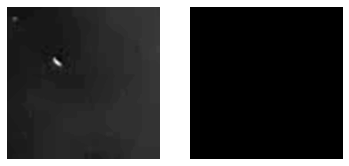

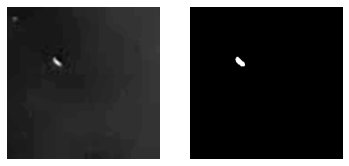

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 3.5
Accuracy                                     : 0.9509450354404901
Jaccard score                                : 0.3248896420527059
Precision                                    : 0.7937757080006934
Recall                                       : 0.3449198590797284
Number of cells in predictions               : 56347
Number of cells in masks                     : 31096


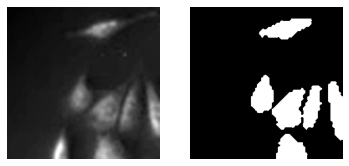

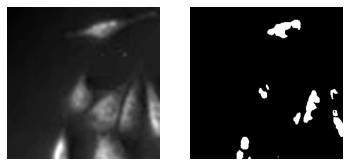

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 4.0
Accuracy                                     : 0.946500773710363
Jaccard score                                : 0.25252517049083834
Precision                                    : 0.7401718653700161
Recall                                       : 0.2669100295298287
Number of cells in predictions               : 48915
Number of cells in masks                     : 27384


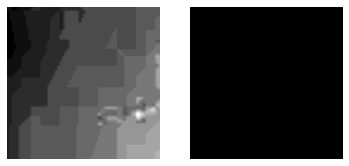

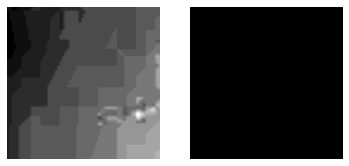

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 4.5
Accuracy                                     : 0.942535862642176
Jaccard score                                : 0.18538633661207196
Precision                                    : 0.6752603515414556
Recall                                       : 0.19417219608474248
Number of cells in predictions               : 40292
Number of cells in masks                     : 23247


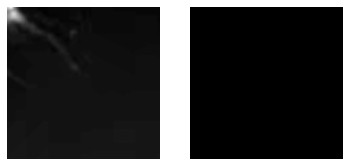

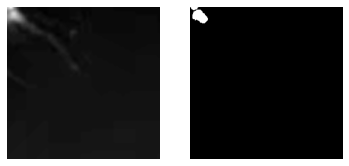

ZOOMING FACTOR FROM ORIGINAL IMAGES          : 5.0
Accuracy                                     : 0.9408173168406767
Jaccard score                                : 0.14393090879983106
Precision                                    : 0.6344171920534197
Recall                                       : 0.14916450817357985
Number of cells in predictions               : 34519
Number of cells in masks                     : 20850


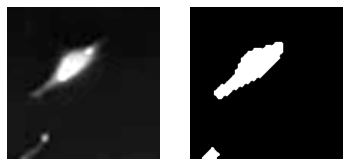

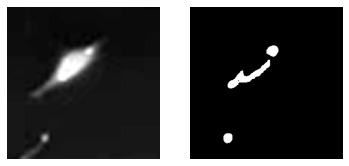

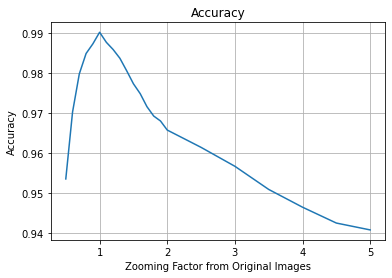

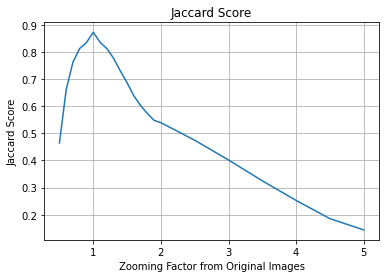

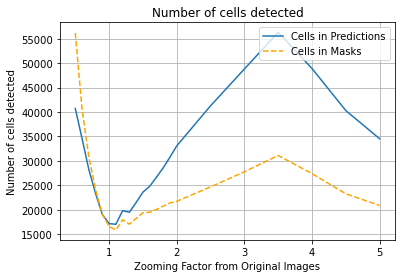

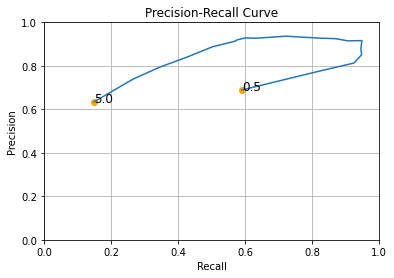

In [10]:
parameter_name = "Zooming Factor from Original Images"
zooms = np.r_[np.linspace(0.5, 2, 15, endpoint=False), np.linspace(2, 5, 7)]
results = {}
for zoom in zooms:
    patch_shape = (int(images_shape[0] / zoom), int(images_shape[1] / zoom), 1)
    n_patches = np.clip(np.prod(np.divide(full_images_shape, patch_shape)), 6, 80).astype('uint')
    patch_images, patch_masks = split_images_and_masks_into_patches(test_full_images, test_full_masks, patch_shape, n_patches)
    
    zoomed_test_images = apply_distortion_to_all(zoom_image_to_meet_shape, patch_images, {"shape": images_shape})
    zoomed_test_masks  = apply_distortion_to_all(zoom_image_to_meet_shape, patch_masks , {"shape": images_shape})

    result = evaluate_model(zoomed_test_images, zoomed_test_masks, model)
    results[zoom] = result
    
    evaluation_summary(result, parameter_name, zoom, zoomed_test_images[0], zoomed_test_masks[0], zoomed_test_images[0], model)
    
plot_all(results, parameter_name)